In [56]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord

# Python standard-library
from urllib.parse import urlencode
from urllib.request import urlretrieve

import numpy as np

# Third-party dependencies
from astropy import units as u

from IPython.display import Image

from astroquery.sdss import SDSS

from astropy import coordinates as coords


import matplotlib 
matplotlib.use('Agg')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

Here we are reusing code from these tutorials:

http://astropy-tutorials.readthedocs.io/en/latest/rst-tutorials/Coordinates-Intro.html

In [2]:
galaxy_name = 'NGC5406'
galaxy = SkyCoord.from_name(galaxy_name)

In [3]:
pos = coords.SkyCoord(galaxy.ra, galaxy.dec, frame='icrs')
print(pos)

<SkyCoord (ICRS): (ra, dec) in deg
    ( 210.08384012,  38.91541833)>


In [16]:
# Get a picture from SDSS DR12 image service
im_size = 3*u.arcmin # get a 25 arcmin square
im_pixels = 1024
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=galaxy.ra.deg,
                              dec=galaxy.dec.deg,
                              width=im_pixels, height=im_pixels,
                              scale=im_size.to(u.arcsec).value/im_pixels))
url = cutoutbaseurl + '?' + query_string

# this downloads the image
image_name = galaxy_name+'_SDSS_cutout.jpg'
urlretrieve(url, image_name)

('NGC5406_SDSS_cutout.jpg', <http.client.HTTPMessage at 0x111618278>)

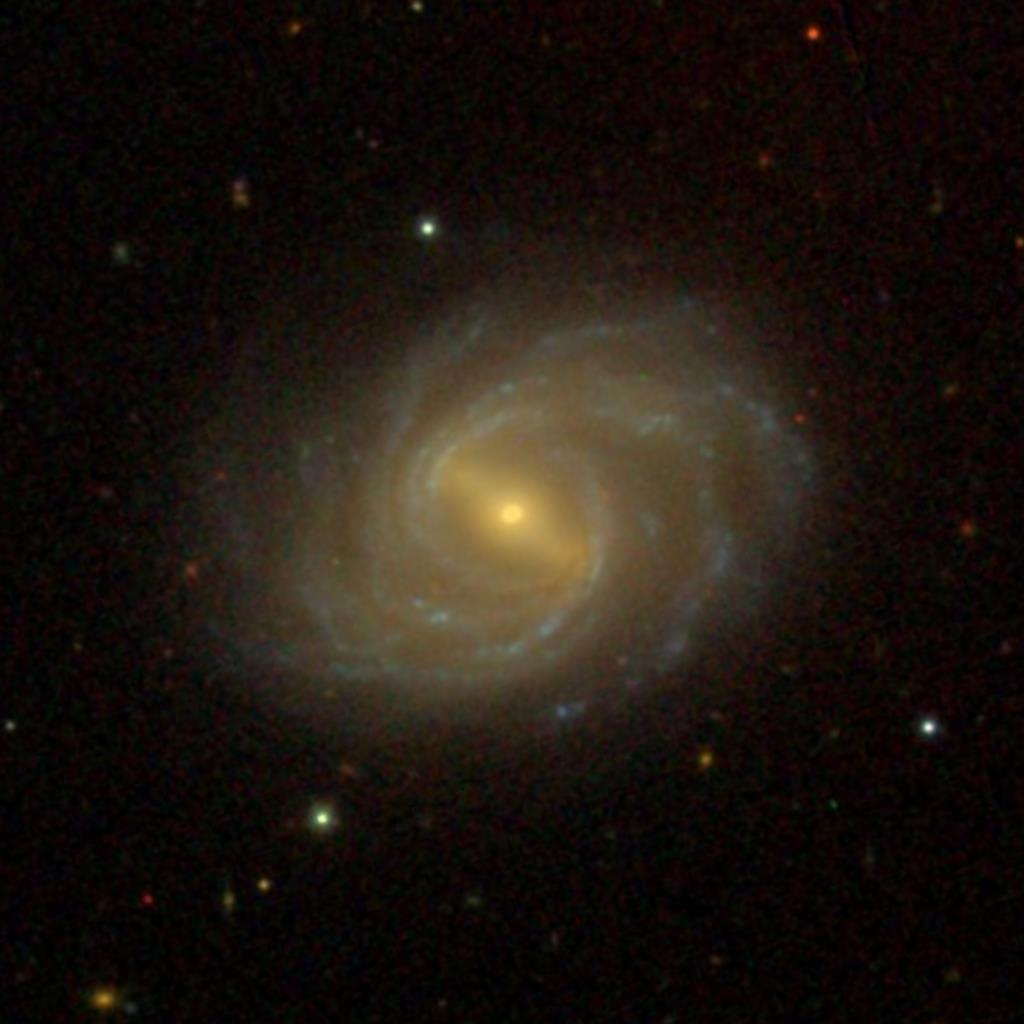

In [17]:
Image(image_name)

In [18]:
xid = SDSS.query_region(pos, spectro=True)

In [26]:
print(xid)

      ra           dec             objid        ... run2d instrument
------------- ------------- ------------------- ... ----- ----------
210.083828827 38.9154295385 1237662305650999364 ...    26       SDSS
210.083828827 38.9154295385 1237662305650999364 ...    26       SDSS


In [27]:
spectra = SDSS.get_spectra(matches=xid)

In [37]:
print('Spectra 0', spectra[0])
print()
print('Spectra 1', spectra[1])

Spectra 0 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x11181fc50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111a46e10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x10dea4f60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111a52898>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x110c6fc88>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x110c64a58>]

Spectra 1 [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x111821be0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111839e10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111963f98>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111970a20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111a4d2e8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1119990b8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111bdaac8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111bf2518>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x111c04f28>, <astropy.io.fits.hdu.table.BinTabl

The spectrum is stored as a table in the second item of the list.
Pay attention to the field `dtype` (data type). It tells you the name of the different columns available in that table.

Please also check the documentation so that you can see what are the units
https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/spectra/PLATE4/spec.html

In [64]:
spectra[0][1].data

FITS_rec([(50.874332, 3.5820999, 0.015997987, 0, 0, 1.2537431, 18.965096, 54.00779),
       (57.513275, 3.5822001, 0.015762132, 0, 0, 1.2534989, 13.727366, 59.60799),
       (69.495064, 3.5822999, 0.014705068, 0, 0, 1.2532547, 13.948431, 64.477501),
       ...,
       (220.67738, 3.9626, 0.011592147, 0, 0, 0.6516189, 2.5678709, 216.36646),
       (215.26912, 3.9626999, 0.011552368, 0, 0, 0.6513961, 3.3582566, 216.33578),
       (220.03197, 3.9628, 0.011591158, 0, 0, 0.65117323, 3.8935299, 216.30508)], 
      dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

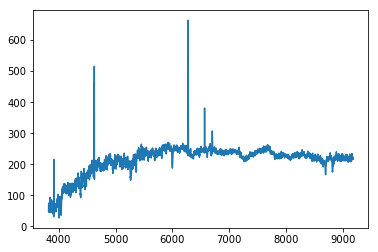

In [111]:
spectrum = spectra[0][1].data
plt.plot(10**spectrum['loglam'], spectrum['flux'])

The fourth record stores the positions of some emission lines

In [116]:
spectra[1][3].data

FITS_rec([ (1379, 53084, 313, 'Ly_alpha', 1215.6700000000001, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0, 0, 0.0, -1.0),
       (1379, 53084, 313, 'N_V 1240', 1240.8099999999999, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0, 0, 0.0, -1.0),
       (1379, 53084, 313, 'C_IV 1549', 1549.48, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0, 0, 0.0, -1.0),
       (1379, 53084, 313, 'He_II 1640', 1640.4200000000001, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0, 0, 0.0, -1.0),
       (1379, 53084, 313, 'C_III] 1908', 1908.7339999999999, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0, 0, 0.0, -1.0),
       (1379, 53084, 313, 'Mg_II 2799', 2800.3151836549728, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0.0, -1.0, 0, 0, 0.0, -1.0),
       (1379, 53084, 313, '[O_II] 3725', 3727.0917267979871, 0.017668409, 2.9385432e-05, 399.40662, 11.456001, 0.0, -2.0, 0.0, -2.0, 62.602974, 0.0, 0, 0, 0.0, -1.0),
       (1379, 53084, 313, '[O_II] 3727', 3729.

In [120]:
lines = spectra[0][3].data

In [121]:
lines['LINENAME']

chararray(['Ly_alpha', 'N_V 1240', 'C_IV 1549', 'He_II 1640', 'C_III] 1908',
       'Mg_II 2799', '[O_II] 3725', '[O_II] 3727', '[Ne_III] 3868',
       'H_epsilon', '[Ne_III] 3970', 'H_delta', 'H_gamma', '[O_III] 4363',
       'He_II 4685', 'H_beta', '[O_III] 4959', '[O_III] 5007',
       'He_II 5411', '[O_I] 5577', '[O_I] 6300', '[S_III] 6312',
       '[O_I] 6363', '[N_II] 6548', 'H_alpha', '[N_II] 6583',
       '[S_II] 6716', '[S_II] 6730', '[Ar_III] 7135'], 
      dtype='<U13')

In [123]:
lines['LINEWAVE'][lines['LINENAME']=='[O_II] 3727']

array([ 3729.875448])

In [122]:
lines['LINEWAVE'][lines['LINENAME']=='H_beta']

array([ 4862.68299373])

In [98]:
lines['LINEWAVE'][lines['LINENAME']=='H_alpha']

array([ 6564.61389433])

Overplotting these lines on the spectrum

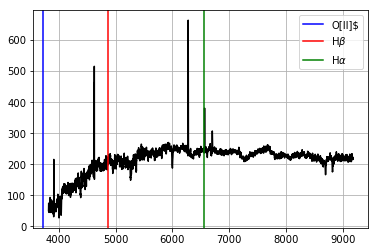

In [125]:
plt.plot(10**spectrum['loglam'], spectrum['flux'], color='black')
plt.axvline(x=lines['LINEWAVE'][lines['LINENAME']=='[O_II] 3727'], label=r'O[II]$', color='blue')
plt.axvline(x=lines['LINEWAVE'][lines['LINENAME']=='H_beta'], label=r'H$\beta$', color='red')
plt.axvline(x=lines['LINEWAVE'][lines['LINENAME']=='H_alpha'], label=r'H$\alpha$', color='green')

plt.legend()
plt.grid()

In [109]:
(6200/6564 - 1.0) * 300000

-16636.19744058502

We can also get the images in the different SDSS bands (u,g,r,i,z)

The documentation describing the imaging data is here:
https://data.sdss.org/datamodel/files/BOSS_PHOTOOBJ/frames/RERUN/RUN/CAMCOL/frame.html

In [249]:
images = SDSS.get_images(matches=xid, band='g')

In [250]:
image_data =  images[1][0].data


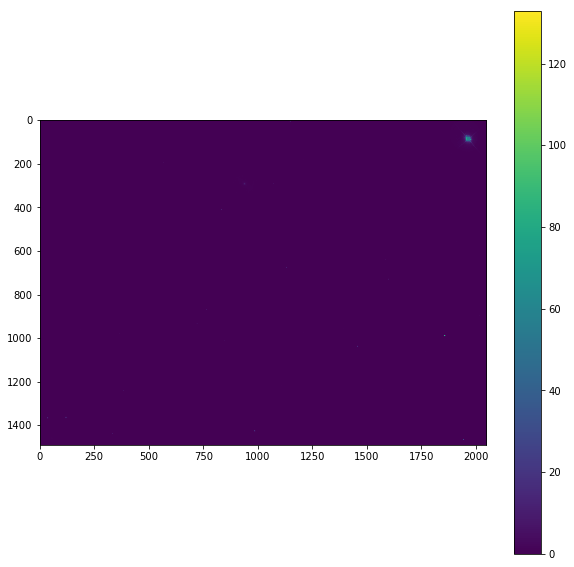

In [251]:
plt.figure(figsize=(10,10))
plt.imshow(image_data)
plt.colorbar()

In [252]:
clipped_image = image_data.copy()
clipped_image[clipped_image>1.0]=1.0

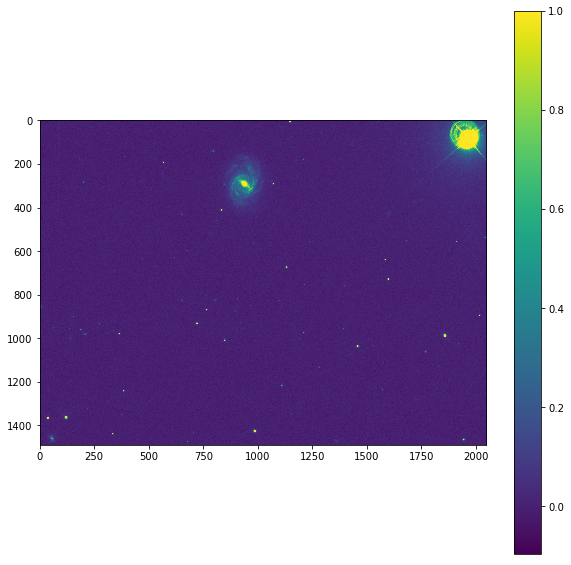

In [253]:
plt.figure(figsize=(10,10))
plt.imshow(clipped_image)
plt.colorbar()

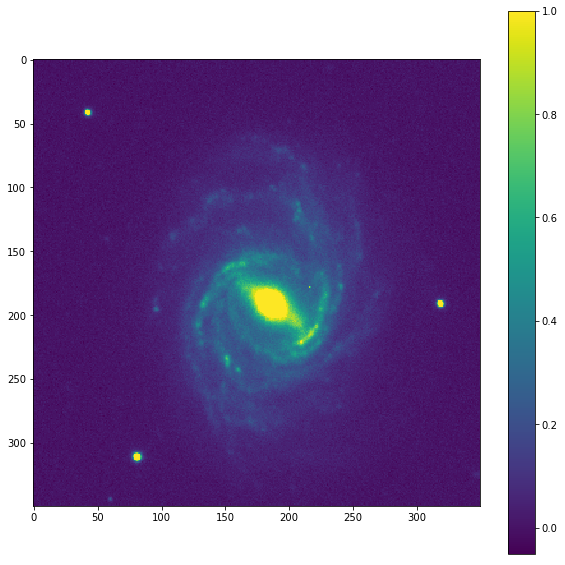

In [254]:
plt.figure(figsize=(10,10))
plt.imshow(clipped_image[100:450,750:1100])
plt.colorbar()

/Users/forero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


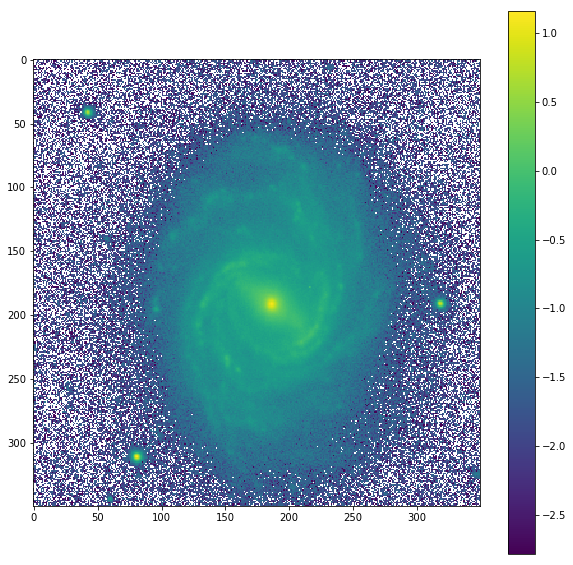

In [255]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(image_data[100:450,750:1100]))
plt.colorbar()